# Experimento de analise geral.

## TL;DR

nesse notebook estudamos como é o funcionamento do CCA e como podemos aplicar o CTW futuramente 

## Objetivo

estudar como cada séries dos usuários iria se comportar de acordo com a lógica do CCA 

## Dados

CSV's





1) Entender de fato o que é o CTW 
2) Ver como ele correlaciona com o DTW e o CCA 
3) Aplicar o CTW e ver o resultado 
4) Fazer testes com diversas Features do XYZ-J e XYZ-Q 
5) Fazer o CTW com o CCA XYZ de dois ângulos (usamos o CTW como ferramenta de comparação de 2 angulos)
6) Fazer a comparação com 2 CTW 


Notebooks 


1-) 2 exercícios de 2 Voluntários


2-) cada usuário (7) concatenar os exercícios deles para ter 7 trial . E aplicar CTA neles

Importando as bibliotecas

In [31]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import CCA
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import seaborn as sns


In [32]:
# Load time series data
df_original = pd.read_csv('../../data/data_rafael_tratado/Voluntário 1_Ex1.csv')
df = df_original.copy()
df.head()

,859.0118,0.006835938,0.9052734,0.2714844,-5.25,-0.375,-0.5,0.59375,0.2441406,0.8144531,...,-0.5625,-0.875,0.71875,102.9769,91.90424,186.9064,86.0516,198.7182,161.6328,0.0
0,859.0450,0.058594,0.990234,0.235352,-3.0625,-1.06250,-0.1875,0.593750,0.244141,0.814453,...,-0.56250,-0.8750,0.71875,102.9769,91.90424,186.9064,86.05160,198.7182,161.6328,0.033333
1,859.0781,0.058594,0.990234,0.235352,-3.0625,-1.06250,-0.1875,0.547852,0.257812,0.827148,...,-1.46875,-0.6875,-0.25000,102.9769,91.90424,186.9064,86.24536,198.8709,161.5619,0.066667
2,859.1118,0.058594,0.990234,0.235352,-3.0625,-1.06250,-0.1875,0.547852,0.257812,0.827148,...,-1.46875,-0.6875,-0.25000,102.9769,91.90424,186.9064,85.88944,199.3856,161.8221,0.100000
3,859.1449,-0.026367,0.973633,0.260742,-0.9375,0.03125,-0.5000,0.547852,0.257812,0.827148,...,-0.06250,-0.9375,0.40625,102.9769,91.90424,186.9064,85.88944,199.3856,161.8221,0.133333
4,859.1778,-0.026367,0.973633,0.260742,-0.9375,0.03125,-0.5000,0.547852,0.257812,0.827148,...,-0.06250,-0.9375,0.40625,103.3091,91.58360,186.5158,85.88944,199.3856,161.8221,0.166667


In [33]:
# Extracting angles
quadril = df.iloc[:, 19:22]  # columns 19, 20, 21 (x, y, z)
joelho = df.iloc[:, 22:25]  # columns 22, 23, 24 (x, y, z)

# Rename columns
quadril.columns = ['Quadril_X', 'Quadril_Y', 'Quadril_Z']
joelho.columns = ['Joelho_X', 'Joelho_Y', 'Joelho_Z']


In [34]:
#quadril.head()
#joelho.head()

In [35]:
scaler = StandardScaler()
joelho_normalizado = scaler.fit_transform(joelho)
quadril_normalizado = scaler.fit_transform(quadril)


In [36]:
# Create a CCA model with 3 components (because we have 3D data each)
cca = CCA(n_components=2)
knee_c, wrist_c = cca.fit_transform(joelho_normalizado, quadril_normalizado)



#### Portanto agora cada um dos   `*_c` é um canonical component (1D vector of max correlation)


In [37]:
# Correlation between canonical components
corrs = [np.corrcoef(knee_c[:, i], wrist_c[:, i])[0, 1] for i in range(2)]
for i, c in enumerate(corrs):
    print(f"Canonical Correlation {i+1}: {c:.4f}")


Canonical Correlation 1: 0.9306
Canonical Correlation 2: 0.5242


Observando a componente 1

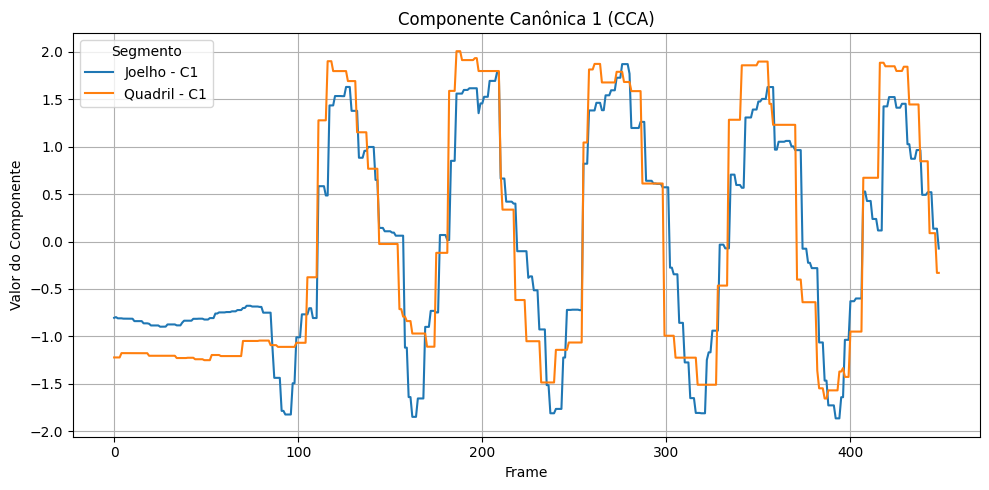

In [38]:
# Criando um DataFrame com os dados da componente C1
df_plot = pd.DataFrame({
    'Frame': range(len(knee_c)),
    'Joelho - C1': knee_c[:, 0],
    'Quadril - C1': wrist_c[:, 0]
})

# Convertendo para formato long (necessário para sns.lineplot)
df_plot_long = pd.melt(df_plot, id_vars='Frame', value_vars=['Joelho - C1', 'Quadril - C1'],
                       var_name='Segmento', value_name='Valor')

# Plot com Seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot_long, x='Frame', y='Valor', hue='Segmento')
plt.title('Componente Canônica 1 (CCA)')
plt.xlabel('Frame')
plt.ylabel('Valor do Componente')
plt.grid(True)
plt.tight_layout()
plt.show()


printando os pesos de como cada um dos angulos X Y Z tem relação com as componentes canônicas
“Qual é a forma mais forte (linear) com que o movimento do joelho (XYZ) se relaciona com o movimento do quadril (XYZ)?” 

In [39]:
print("Pesos Joelho (x_weights_):\n", cca.x_weights_)
print("Pesos Quadril (y_weights_):\n", cca.y_weights_)


Pesos Joelho (x_weights_):
 [[ 0.98636579 -0.13810775]
 [ 0.16302307  0.74567192]
 [-0.02249472 -0.65184326]]
Pesos Quadril (y_weights_):
 [[ 0.84976317 -0.5248519 ]
 [-0.52115396 -0.85047808]
 [-0.07937947 -0.03489305]]


In [40]:
display(pd.DataFrame(cca.x_weights_))
display(pd.DataFrame(cca.y_weights_))

,0,1
0,0.986366,-0.138108
1,0.163023,0.745672
2,-0.022495,-0.651843


,0,1
0,0.849763,-0.524852
1,-0.521154,-0.850478
2,-0.079379,-0.034893


| Componente | Joelho\_X | Joelho\_Y | Joelho\_Z | Interpretação                                                            |
| ---------- | --------- | --------- | --------- | ------------------------------------------------------------------------ |
| **C1**     | 0.9864    | 0.1630    | -0.0225   | 🠒 Principalmente **movimento em X** do joelho                           |
| **C2**     | -0.1381   | 0.7457    | -0.6518   | 🠒 Combinação de **Y positivo** e **Z negativo**                         |
| **C3**     | -0.0895   | 0.6461    | 0.7580    | 🠒 Combinação de **Y e Z positivos**, quase um vetor oblíquo no plano YZ |


| Componente | Quadril\_X | Quadril\_Y | Quadril\_Z | Interpretação                                          |
| ---------- | ---------- | ---------- | ---------- | ------------------------------------------------------ |
| **C1**     | 0.8498     | -0.5212    | -0.0794    | 🠒 Maior peso em **X**, com contribuição negativa de Y |
| **C2**     | -0.5249    | -0.8505    | -0.0349    | 🠒 Forte componente em **Y negativo**, e um pouco em X |
| **C3**     | 0.0493     | -0.0713    | 0.9962     | 🠒 Quase **totalmente o eixo Z** do quadril            |


## Conclusão Geral


| Componente | Contribuição Principal   | Relação Biomecânica                                               |
| ---------- | ------------------------ | ----------------------------------------------------------------- |
| **C1**     | Joelho\_X ⟷ Quadril\_X   | Avanço sincronizado das pernas e quadril                          |
| **C2**     | Joelho\_YZ ⟷ Quadril\_XY | Padrões de oscilação e rotação lateral durante marcha             |
| **C3**     | Joelho\_YZ ⟷ Quadril\_Z  | Movimento vertical pouco relevante; talvez impacto ou ajuste fino |
